Jupyter Notebook for analyzing error files from motor routines

In [127]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import linregress

In [128]:
filename = "_axis_A_complete_raw_error_29.hdf5"

with h5py.File(filename, "r") as f:
    # Print all root level object names (aka keys) 
    # these can be group or dataset names 
    print("Keys: %s" % f.keys())
    # get first object name/key; may or may NOT be a group
    a_group_key = list(f.keys())[0]

    # get the object type for a_group_key: usually group or dataset
    print(type(f[a_group_key])) 

    # If a_group_key is a group name, 
    # this gets the object names in the group and returns as a list
    data = list(f[a_group_key])

    # If a_group_key is a dataset name, 
    # this gets the dataset values and returns as a list
    data = list(f[a_group_key])
    # preferred methods to get dataset values:
    ds_obj = f[a_group_key]      # returns as a h5py dataset object
    ds_arr = f[a_group_key][()]  # returns as a numpy array

Keys: <KeysViewHDF5 ['Error (counts)', 'Time (s)']>
<class 'h5py._hl.dataset.Dataset'>


In [129]:
#extract time as a numpy array from the dataset
with h5py.File(filename, "r") as f:
    b_group_key = list(f.keys())[1]

    print(type(f[b_group_key]))

    data2 = list(f[b_group_key])

    data2 = list(f[b_group_key])

    ds_obj2 = f[b_group_key]
    ds_arr2 = f[b_group_key][()]

<class 'h5py._hl.dataset.Dataset'>


In [130]:
list(data)

[0.0,
 -27.0,
 -27.0,
 -26.0,
 -26.0,
 -27.0,
 -28.0,
 -28.0,
 -28.0,
 -28.0,
 -30.0,
 -30.0,
 -31.0,
 -32.0,
 -32.0,
 -34.0,
 -35.0,
 -36.0,
 -38.0,
 -38.0,
 -40.0,
 -37.0,
 -37.0,
 -37.0,
 -37.0,
 -37.0,
 -37.0,
 -37.0,
 0.0,
 35.0,
 37.0,
 36.0,
 33.0,
 32.0,
 31.0,
 31.0,
 29.0,
 29.0,
 29.0,
 28.0,
 30.0,
 29.0,
 28.0,
 29.0,
 28.0,
 27.0,
 28.0,
 29.0,
 28.0,
 27.0,
 25.0,
 26.0,
 26.0,
 25.0,
 24.0,
 25.0,
 25.0,
 25.0,
 25.0,
 25.0,
 25.0,
 27.0,
 28.0,
 30.0,
 27.0,
 27.0,
 0.0,
 -20.0,
 -18.0,
 -17.0,
 -17.0,
 -18.0,
 -18.0,
 -17.0,
 -17.0,
 -17.0,
 -18.0,
 -18.0,
 -18.0,
 -18.0,
 -19.0,
 -19.0,
 -20.0,
 -19.0,
 -20.0,
 -21.0,
 -22.0,
 -21.0,
 -20.0,
 -21.0,
 -23.0,
 -23.0,
 -24.0,
 -23.0,
 -24.0,
 -25.0,
 -27.0,
 -28.0,
 -34.0,
 -27.0,
 -27.0,
 -27.0,
 -27.0,
 -27.0,
 -27.0,
 -27.0,
 -27.0,
 -27.0,
 -27.0,
 -27.0,
 -27.0,
 0.0,
 41.0,
 41.0,
 37.0,
 36.0,
 35.0,
 35.0,
 34.0,
 33.0,
 34.0,
 35.0,
 32.0,
 32.0,
 33.0,
 34.0,
 33.0,
 32.0,
 32.0,
 33.0,
 33.0,
 32.0,
 32.0,
 3

In [131]:
list(data2)

[0.053427934646606445,
 0.06711244583129883,
 0.09374308586120605,
 0.12020611763000488,
 0.14688348770141602,
 0.17361903190612793,
 0.20029926300048828,
 0.2270054817199707,
 0.25361013412475586,
 0.2802257537841797,
 0.30670619010925293,
 0.33363962173461914,
 0.3602118492126465,
 0.3870053291320801,
 0.41358494758605957,
 0.44039225578308105,
 0.46693992614746094,
 0.493729829788208,
 0.5202383995056152,
 0.5469932556152344,
 0.573638916015625,
 0.6003246307373047,
 0.6270992755889893,
 0.6536669731140137,
 0.6803319454193115,
 0.7069873809814453,
 0.7337281703948975,
 0.7606372833251953,
 0.787193775177002,
 0.8135864734649658,
 0.840386152267456,
 0.8671584129333496,
 0.8938155174255371,
 0.9202792644500732,
 0.9470846652984619,
 0.9737050533294678,
 1.0002880096435547,
 1.0269193649291992,
 1.0535902976989746,
 1.080190896987915,
 1.1069974899291992,
 1.1336486339569092,
 1.1603496074676514,
 1.186873435974121,
 1.2135567665100098,
 1.2403318881988525,
 1.2670094966888428,
 1.29

In [132]:
print(max(data))
print(min(data))
print("average: ", sum(data)/len(data))

42.0
-48.0
average:  19.08881861094741


Text(0, 0.5, 'Error (counts)')

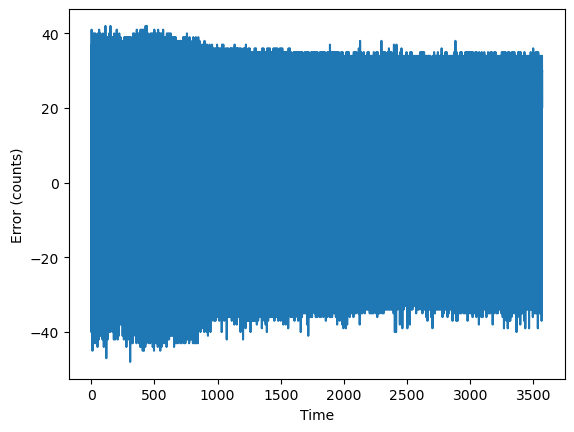

In [133]:
# plot data2 (time) vs data (error)
plt.plot(data2, data)
plt.xlabel('Time')
plt.ylabel('Error (counts)')

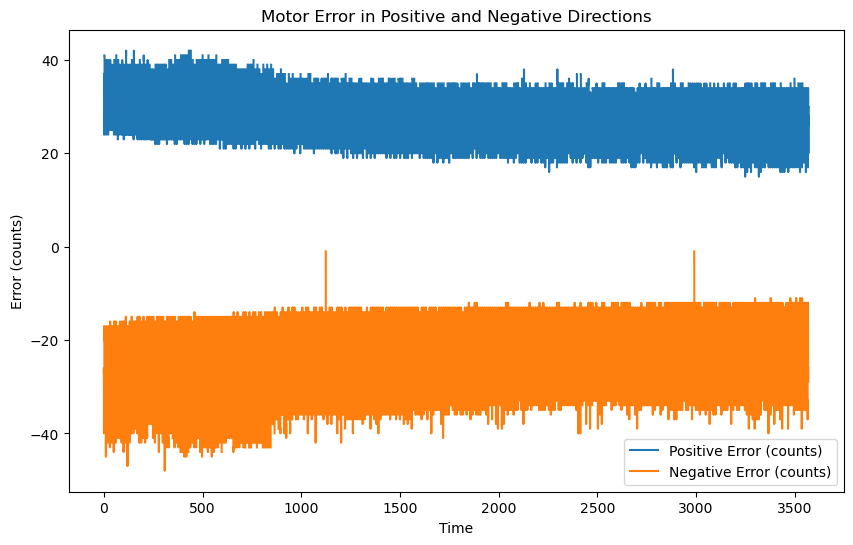

In [134]:
# Separate positive and negative errors
positive_errors = [e if e > 0 else np.nan for e in data]
negative_errors = [e if e < 0 else np.nan for e in data]

# linear regression line for both positive and negative error values
# positive regression line

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(data2, positive_errors, label='Positive Error (counts)')
plt.plot(data2, negative_errors, label='Negative Error (counts)')

# Labels and title
plt.xlabel("Time")
plt.ylabel("Error (counts)")
plt.title("Motor Error in Positive and Negative Directions")
plt.legend()

plt.show()

In [135]:
#calculate mean error, median error, and standard deviation of both positive and negative errors
positive_errors = np.array(positive_errors)
negative_errors = np.array(negative_errors)

mean_positive_error = np.nanmean(positive_errors)
median_positive_error = np.nanmedian(positive_errors)
std_positive_error = np.nanstd(positive_errors)
var_positive_error = np.nanvar(positive_errors)
max_positive_error = np.nanmax(positive_errors)
min_positive_error = np.nanmin(positive_errors)
rms_positive_error = np.sqrt(np.nanmean(positive_errors**2))

#negative error statistics
mean_negative_error = np.nanmean(negative_errors)
median_negative_error = np.nanmedian(negative_errors)
std_negative_error = np.nanstd(negative_errors)
var_negative_error = np.nanvar(negative_errors)
max_negative_error = np.nanmax(negative_errors)
min_negative_error = np.nanmin(negative_errors)
rms_negative_error = np.sqrt(np.nanmean(negative_errors**2))

#printing positive and negative error statistics
print("Positive Error Statistics")
print(f"Mean: {mean_positive_error}")
print(f"RMS error: {rms_positive_error}")
print(f"Median: {median_positive_error}")
print(f"Standard Deviation: {std_positive_error}")
print(f"Var: {var_positive_error}")
print(f"Max: {max_positive_error}")
print(f"Min: {min_positive_error}\n")

print("Negative Error Statistics")
print(f"Mean: {mean_negative_error}")
print(f"RMS error (Abs): {rms_negative_error}")
print(f"Median: {median_negative_error}")
print(f"Standard Deviation: {std_negative_error}")
print(f"Var: {var_negative_error}")
print(f"Max (Abs): {min_negative_error}")
print(f"Min (Abs): {max_negative_error}")


Positive Error Statistics
Mean: 29.085554342087182
RMS error: 29.203325772966693
Median: 29.0
Standard Deviation: 2.6200696203563525
Var: 6.864764815514281
Max: 42.0
Min: 15.0

Negative Error Statistics
Mean: -23.671390695031878
RMS error (Abs): 24.620101356844298
Median: -23.0
Standard Deviation: 6.768652257609686
Var: 45.814653384444696
Max (Abs): -48.0
Min (Abs): -1.0


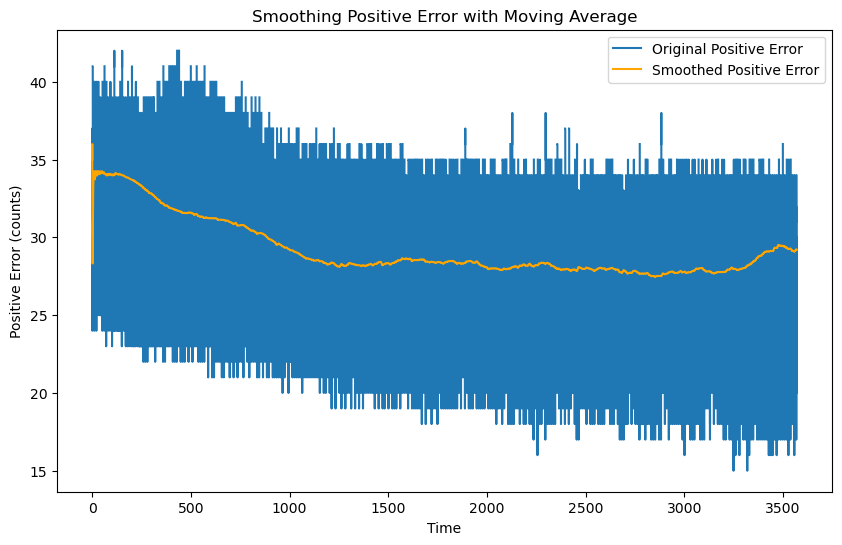

In [136]:
# Create DataFrame
df = pd.DataFrame({
    'Time': data2,
    'Positive Error (counts)': positive_errors
})

# Apply moving average smoothing with a window size of 3 (or any appropriate size for your data)
df['Positive Error (counts) Smoothed'] = df['Positive Error (counts)'].rolling(window=10000, min_periods=1).mean()

# Plot the original positive error and smoothed data
plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Positive Error (counts)'], label='Original Positive Error')
plt.plot(df['Time'], df['Positive Error (counts) Smoothed'], label='Smoothed Positive Error', color='orange')

# Labels and title
plt.xlabel("Time")
plt.ylabel("Positive Error (counts)")
plt.title("Smoothing Positive Error with Moving Average")
plt.legend()

plt.show()

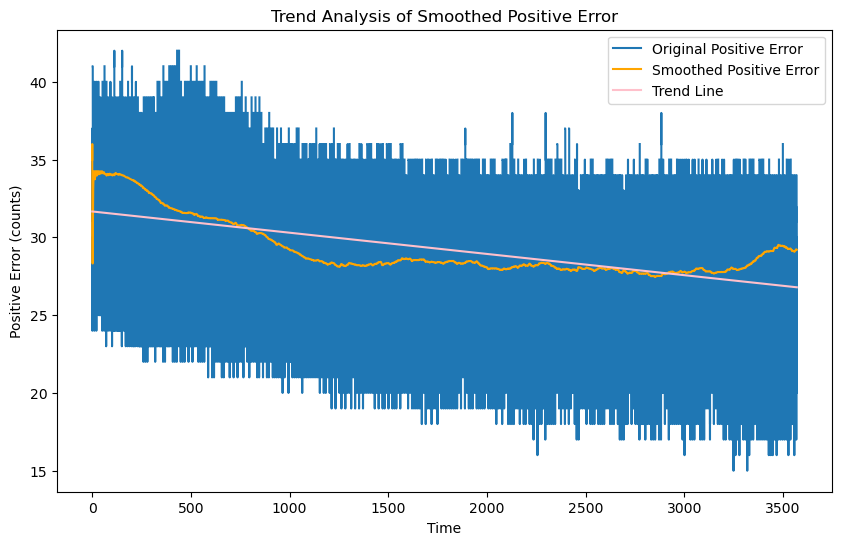

Slope of the trend line: -0.0014
The positive direction error is decreasing over time.


In [137]:
# Remove NaN values for linear regression calculation (NaNs could interfere with fitting)
valid_data = df.dropna(subset=['Positive Error (counts) Smoothed'])

# Perform linear regression to find the trend line
slope, intercept, r_value, p_value, std_err = linregress(valid_data['Time'], valid_data['Positive Error (counts) Smoothed'])

# Plot the data and the trend line
plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Positive Error (counts)'], label='Original Positive Error')
plt.plot(df['Time'], df['Positive Error (counts) Smoothed'], label='Smoothed Positive Error', color='orange')
plt.plot(valid_data['Time'], intercept + slope * valid_data['Time'], label='Trend Line', color='pink')

# Labels and title
plt.xlabel("Time")
plt.ylabel("Positive Error (counts)")
plt.title("Trend Analysis of Smoothed Positive Error")
plt.legend()
plt.show()

# Display the slope
print(f"Slope of the trend line: {slope:.4f}")
if slope > 0:
    print("The positive direction error is increasing over time.")
elif slope < 0:
    print("The positive direction error is decreasing over time.")
else:
    print("The positive direction error has no significant trend.")

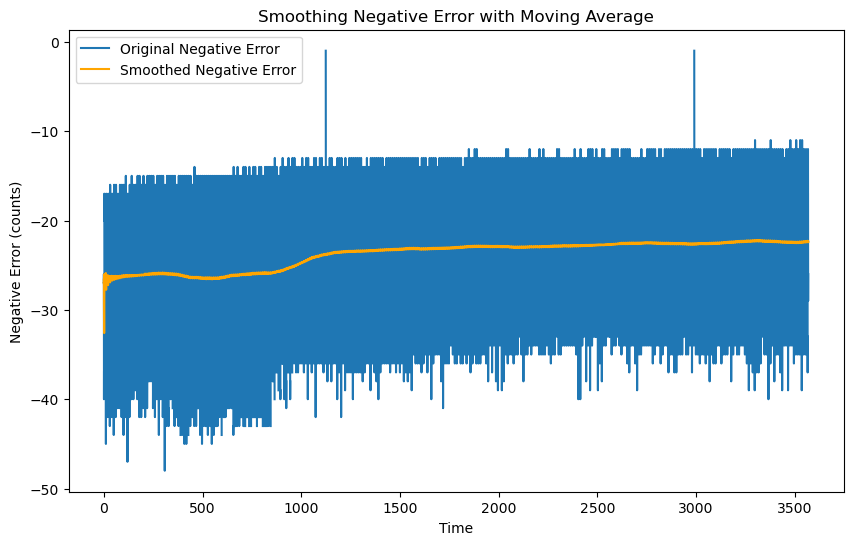

In [138]:
# Create DataFrame
df = pd.DataFrame({
    'Time': data2,
    'Negative Error (counts)': negative_errors
})

# Apply moving average smoothing with a window size of 3 (or any appropriate size for your data)
df['Negative Error (counts) Smoothed'] = df['Negative Error (counts)'].rolling(window=10000, min_periods=1).mean()

# Plot the original positive error and smoothed data
plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Negative Error (counts)'], label='Original Negative Error')
plt.plot(df['Time'], df['Negative Error (counts) Smoothed'], label='Smoothed Negative Error', color='orange')

# Labels and title
plt.xlabel("Time")
plt.ylabel("Negative Error (counts)")
plt.title("Smoothing Negative Error with Moving Average")
plt.legend()

plt.show()

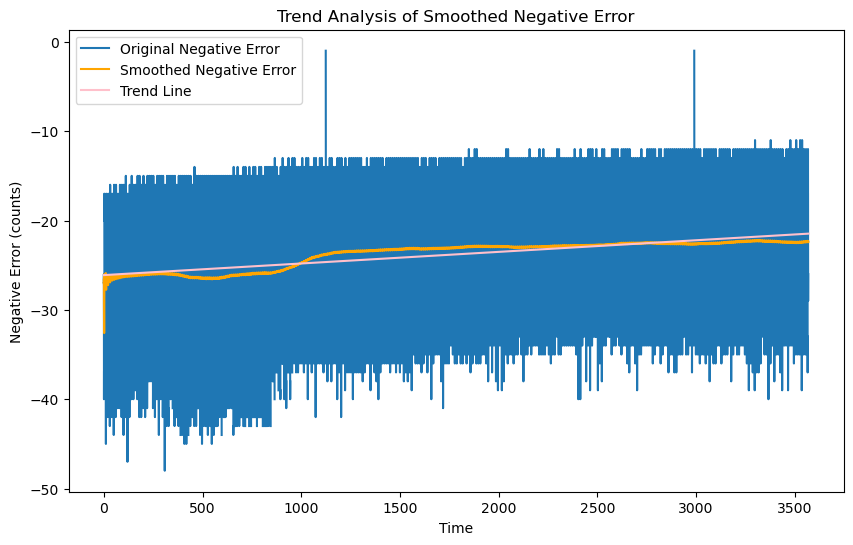

Slope of the trend line: 0.0013
The negative direction error is decreasing over time.


In [139]:
# Remove NaN values for linear regression calculation (NaNs could interfere with fitting)
valid_data = df.dropna(subset=['Negative Error (counts) Smoothed'])

# Perform linear regression to find the trend line
slope, intercept, r_value, p_value, std_err = linregress(valid_data['Time'], valid_data['Negative Error (counts) Smoothed'])

# Plot the data and the trend line
plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Negative Error (counts)'], label='Original Negative Error')
plt.plot(df['Time'], df['Negative Error (counts) Smoothed'], label='Smoothed Negative Error', color='orange')
plt.plot(valid_data['Time'], intercept + slope * valid_data['Time'], label='Trend Line', color='pink')

# Labels and title
plt.xlabel("Time")
plt.ylabel("Negative Error (counts)")
plt.title("Trend Analysis of Smoothed Negative Error")
plt.legend()
plt.show()

# Display the slope
print(f"Slope of the trend line: {slope:.4f}")
if slope < 0:
    print("The negative direction error is increasing over time.")
elif slope > 0:
    print("The negative direction error is decreasing over time.")
else:
    print("The negative direction error has no significant trend.")